# Grader:
wrangle_zillow1.py  is the py file created from this exercise \
wrangle_mall.py     is the py file created from this exercise

In [1]:
# personally made imports
import env

# typical imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

In [3]:
def new_zillow_data():
    return pd.read_sql('''SELECT *
FROM properties_2017 p
LEFT JOIN propertylandusetype t USING (propertylandusetypeid)
LEFT JOIN airconditioningtype a USING (airconditioningtypeid)
LEFT JOIN buildingclasstype b USING (buildingclasstypeid)
LEFT JOIN architecturalstyletype ar USING (architecturalstyletypeid)
RIGHT JOIN predictions_2017 pr USING (parcelid)
WHERE t.propertylandusedesc = 'Single Family Residential'
AND pr.transactiondate LIKE "2017%%"
''', url)


import os

def get_zillow_data():
    filename = "zillow.csv"
    
    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col = 0)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        # read the SQL query into a dataframe
        df_zillow = new_zillow_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df_zillow.to_csv(filename)

        # Return the dataframe to the calling code
        return df_zillow

In [4]:
df = new_zillow_data()



Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   id                            52441 non-null  int64  
 2   logerror                      52441 non-null  float64
 3   transactiondate               52441 non-null  object 
 4   architecturalstyletypeid      70 non-null     float64
 5   buildingclasstypeid           0 non-null      object 
 6   airconditioningtypeid         13638 non-null  float64
 7   propertylandusetypeid         52441 non-null  float64
 8   id                            52441 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52441 non-null  float64
 11  bedroomcnt                    52441 non-null  float64
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

### Notes:
drop redundant or useless columns. Drop id keep parcelid. Drop propertylandusedesc, we already filtered to only include single family residences

In [6]:
df = df.drop(columns = ['id', 'propertylandusedesc'])

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52436    False
52437    False
52438    False
52439    False
52440    False
Length: 52441, dtype: bool

In [8]:
df[df.duplicated() == True]

,parcelid,logerror,transactiondate,architecturalstyletypeid,buildingclasstypeid,airconditioningtypeid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,buildingclassdesc,architecturalstyledesc


In [9]:
# There are no entire duplicated rows

In [10]:
df[df.parcelid.duplicated() == True]

,parcelid,logerror,transactiondate,architecturalstyletypeid,buildingclasstypeid,airconditioningtypeid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,buildingclassdesc,architecturalstyledesc
672,11721753,0.017785,2017-07-21,NaN,None,NaN,261.0,NaN,2.0,3.0,6.0,2.0,NaN,NaN,1316.0,1316.0,None,None,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,34033180.0,-118355396.0,5672.0,NaN,NaN,NaN,NaN,NaN,0100,LARD1.5,6.037220e+07,12447.0,3101.0,268581.0,95997.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1923.0,NaN,NaN,41948.0,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,None,None,None
835,11289917,-0.362001,2017-06-23,NaN,None,1.0,261.0,NaN,2.0,3.0,6.0,2.0,NaN,NaN,1458.0,1458.0,None,None,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,Central,None,None
1196,11705026,-0.146056,2017-06-30,NaN,None,NaN,261.0,NaN,1.0,2.0,6.0,1.0,NaN,NaN,1421.0,1421.0,None,None,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,None,None,None
1381,14269464,0.021085,2017-06-01,NaN,None,NaN,261.0,NaN,3.0,4.0,NaN,3.0,NaN,NaN,2541.0,2541.0,None,None,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,None,None,None
1796,11446756,-0.163064,2017-08-23,NaN,None,NaN,261.0,NaN,2.0,3.0,6.0,2.0,NaN,NaN,1491.0,1491.0,None,None,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,33873860.0,-118338253.0,5000.0,NaN,NaN,NaN,NaN,NaN,0100,TORR-LO,6.037650e+07,54722.0,3101.0,274750.0,96162.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1955.0,NaN,NaN,60537.0,107110.0,2016.0,46573.0,1399.27,None,NaN,6.037650e+13,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35442,12621730,0.098020,2017-08-29,NaN,None,NaN,261.0,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2354.0,2354.0,None,None,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,33807990.0,-118296159.0,6534.0,1.0,NaN,NaN,NaN,1.0,0101,LCR1*,6.037544e+07,118878.0,3101.0,NaN,96210.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1965.0,NaN,NaN,62939.0,97502.0,2016.0,34563.0,5962.64,None,NaN,6.037544e+13,None,None,None
36901,10956664,0.016120,2017-08-31,NaN,None,1.0,261.0,NaN,1.0,2.0,4.0,1.0,NaN,NaN,1178.0,1178.0,None,None,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,34173900.0,-118346284.0,6515.0,NaN,NaN,NaN,NaN,NaN,0100,BUR1*,6.037311e+07,396054.0,3101.0,NaN,96437.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1943.0,NaN,NaN,32782.0,72522.0,2016.0,39740.0,824.09,None,NaN,6.037311e+13,Central,None,None
38621,14448410,1.648574,2017-08-31,NaN,None,NaN,261.0,NaN,3.0,3.0,NaN,3.0,NaN,NaN,1684.0,1684.0,None,None,Na

In [11]:
#There are 121 rows that have duplicate parcel id's. Looking to deremine what happened. 

#### Attempt 1

In [12]:
l = df[df.parcelid.duplicated() == True]

In [13]:
l;

In [14]:
df.apply(lambda df: df.parcelid == l.parcelid, axis = 1);

In [15]:
#that didnt work, try: 

### Attempt 2

In [16]:
df.sort_values('transactiondate').shape

(52441, 63)

In [17]:
#121 rows are duplicates. before dropping 52279 rows

In [18]:
df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')

In [19]:
df.shape

(52320, 63)

In [20]:
52279 - 52162

117

In [21]:
l = df[df.parcelid.duplicated() == True]
l

,parcelid,logerror,transactiondate,architecturalstyletypeid,buildingclasstypeid,airconditioningtypeid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,buildingclassdesc,architecturalstyledesc


In [22]:
#all duplicates dropped!

# Acquired continued

In [23]:
# summary stats, info, dtypes, shape, distributions, value_counts, etc

In [24]:
df.describe()

,parcelid,logerror,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,5.232000e+04,52320.000000,70.00000,13615.000000,52320.0,47.000000,52320.000000,52320.000000,33655.000000,52185.000000,389.0,4371.000000,52239.000000,52074.000000,4371.000000,165.000000,52320.00000,7233.000000,52185.000000,17984.000000,17984.000000,1514.0,33850.000000,5.232000e+04,5.232000e+04,5.195400e+04,11077.0,865.000000,443.0,1071.0,9990.0,5.232000e+04,51284.000000,52320.000000,18981.000000,52294.000000,52320.000000,47.0,6717.000000,76.000000,33762.000000,1935.000000,63.000000,52206.000000,14532.000000,81.0,5.223800e+04,5.231900e+04,52320.0,5.231900e+04,52316.000000,2068.000000,5.219900e+04
mean,1.299682e+07,0.018131,7.10000,2.439589,261.0,678.978723,2.300010,3.300765,6.264894,2.305270,66.0,1546.288035,1923.152702,1925.313899,1567.099291,1241.078788,6049.13555,1.209733,2.240031,1.949066,495.927046,1.0,3.965613,3.402256e+07,-1.181941e+08,1.132335e+04,1.0,518.305202,1.0,1.0,1.0,6.049447e+07,33483.826691,2524.320623,180240.600232,96636.243603,1.894457,7.0,1.013697,5.973684,1.000859,337.359690,225.619048,1963.421254,1.414189,1.0,1.966362e+05,5.298235e+05,2016.0,3.334917e+05,6454.743137,14.101064,6.050245e+13
std,3.350919e+06,0.176905,2.66567,3.847925,0.0,711.825226,1.022807,0.947555,1.716346,1.018067,0.0,675.339282,1004.045419,1003.952951,745.084810,776.959074,21.02913,0.512946,0.993303,0.549974,157.100947,0.0,2.562660,2.740624e+05,3.567149e+05,8.674164e+04,0.0,156.614794,0.0,0.0,0.0,2.086892e+05,49116.149883,804.098580,159928.810868,4610.382493,3.146952,0.0,0.142690,0.229416,0.030290,249.579315,188.505106,23.125670,0.540685,0.0,2.542862e+05,7.518296e+05,0.0,5.705106e+05,8752.477267,2.400399,1.861127e+12
min,1.071186e+07,-4.655420,2.00000,1.000000,261.0,38.000000,0.000000,0.000000,1.000000,1.000000,66.0,184.000000,128.000000,128.000000,184.000000,380.000000,6037.00000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,3.334062e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1878.000000,1.000000,1.0,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,4.000000,6.037101e+13
25%,1.151018e+07,-0.024707,7.00000,1.000000,261.0,263.500000,2.000000,3.000000,5.000000,2.000000,66.0,1151.000000,1268.000000,1270.000000,1152.000000,784.000000,6037.00000,1.000000,2.000000,2.000000,426.000000,1.0,2.000000,3.382690e+07,-1.184009e+08,5.583000e+03,1.0,424.000000,1.0,1.0,1.0,6.037401e+07,12447.000000,1286.000000,41131.000000,96206.000000,0.000000,7.0,1.000000,6.000000,1.000000,200.000000,71.500000,1950.000000,1.000000,1.0,7.715900e+04,1.940330e+05,2016.0,7.619400e+04,2660.982500,14.000000,6.037401e+13
50%,1.257829e+07,0.006934,7.00000,1.000000,261.0,512.000000,2.000000,3.000000,6.000000,2.000000,66.0,1410.000000,1659.000000,1661.000000,1415.000000,1008.000000,6037.00000,1.000000,2.000000,2.000000,462.000000,1.0,2.000000,3.402375e+07,-1.181531e+08,6.841000e+03,1.0,500.000000,1.0,1.0,1.0,6.037620e+07,24812.000000,3101.000000,118208.000000,96412.000000,0.000000,7.0,1.000000,6.000000,1.000000,280.000000,180.000000,1961.000000,1.000000,1.0,1.319050e+05,3.740060e+05,2016.0,2.180790e+05,4

In [25]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52320 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52320 non-null  int64  
 1   logerror                      52320 non-null  float64
 2   transactiondate               52320 non-null  object 
 3   architecturalstyletypeid      70 non-null     float64
 4   buildingclasstypeid           0 non-null      object 
 5   airconditioningtypeid         13615 non-null  float64
 6   propertylandusetypeid         52320 non-null  float64
 7   basementsqft                  47 non-null     float64
 8   bathroomcnt                   52320 non-null  float64
 9   bedroomcnt                    52320 non-null  float64
 10  buildingqualitytypeid         33655 non-null  float64
 11  calculatedbathnbr             52185 non-null  float64
 12  decktypeid                    389 non-null    float64
 13  f

In [26]:
df.shape

(52320, 63)

In [27]:
cols=df.columns

In [28]:
#need further cleaning before doing this. going to clean first and come back.

In [29]:
# for col in cols:
#     print('----------------')
#     print(col)
#     col.value_counts()

In [30]:
# for column in df.columns:
#     print(column)
#     print(df[column].value_counts())
#     print("-----------------")

## Aquire continued and prepare

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.


## Prepare

    Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.


## legal definition:  

Single-family residence means any building situated on one lot with a single dwelling, and sharing no common wall, foundation, or other interconnection with another dwelling unit or other structure or use.

In [31]:
# since the legal definition didn't narrow it down I made the following judgment calls:

In [32]:
df = df[(df.bathroomcnt < 11) & (df.bathroomcnt >= 1)]
df = df[(df.bedroomcnt < 11) & (df.bedroomcnt >= 1)]

In [33]:
# maybe try iqr?

## prepare
Create a function that will drop rows or columns based on the percent of values that are missing:

In [34]:
df.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
architecturalstyletypeid    52092
buildingclasstypeid         52162
                            ...  
taxdelinquencyyear          50102
censustractandblock           111
airconditioningdesc         38562
buildingclassdesc           52162
architecturalstyledesc      52092
Length: 63, dtype: int64

In [35]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    prcnt_miss = (num_missing/df.shape[0]) * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [36]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
finishedsquarefeet13,52162,100.000000
buildingclassdesc,52162,100.000000
buildingclasstypeid,52162,100.000000
finishedsquarefeet15,52162,100.000000
basementsqft,52115,99.909896
...,...,...
logerror,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
fips,0,0.000000


In [37]:
df.shape

(52162, 63)

In [38]:
#set threshold to 50% 
#drop all columns that are >50 nulls

In [39]:
threshold = df.shape[0]/2
threshold

26081.0

In [40]:
df = df.dropna(axis=1, thresh=threshold)

In [41]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
buildingqualitytypeid,18538,35.539281
propertyzoningdesc,18479,35.426172
unitcnt,18451,35.372493
heatingorsystemtypeid,18345,35.169280
regionidcity,1028,1.970783
lotsizesquarefeet,352,0.674821
finishedsquarefeet12,166,0.318239
censustractandblock,111,0.212799
structuretaxvaluedollarcnt,72,0.138032
yearbuilt,40,0.076684


### Notes:
it appears to be a sharp cut off at 35% 
set the new cut off to 33.33%

In [42]:
threshold = df.shape[0]/3
threshold

17387.333333333332

In [43]:
52162 - 17387

34775

In [44]:
df = df.dropna(axis=1, thresh = 34775)

In [45]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
regionidcity,1028,1.970783
lotsizesquarefeet,352,0.674821
finishedsquarefeet12,166,0.318239
censustractandblock,111,0.212799
structuretaxvaluedollarcnt,72,0.138032
yearbuilt,40,0.076684
regionidzip,23,0.044093
calculatedbathnbr,16,0.030674
fullbathcnt,16,0.030674
calculatedfinishedsquarefeet,8,0.015337


In [46]:
df.shape

(52162, 27)

# Returnt to Acquire now that data is cleaner

In [47]:
df.columns

Index(['parcelid', 'logerror', 'transactiondate', 'propertylandusetypeid',
       'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

In [48]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

parcelid
14297519    1
10988846    1
10976437    1
11997371    1
10717871    1
           ..
14347096    1
12251984    1
10912559    1
14064733    1
12826780    1
Name: parcelid, Length: 52162, dtype: int64
-----------------
logerror
 0.000231    5
 0.002652    5
 0.000727    5
 0.001878    5
 0.000420    4
            ..
-0.033509    1
 0.017325    1
-0.000732    1
-0.271602    1
 0.013209    1
Name: logerror, Length: 51904, dtype: int64
-----------------
transactiondate
2017-06-30    806
2017-04-28    612
2017-05-31    564
2017-07-28    544
2017-08-31    528
             ... 
2017-05-13      1
2017-09-02      1
2017-03-25      1
2017-05-07      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64
-----------------
propertylandusetypeid
261.0    52162
Name: propertylandusetypeid, dtype: int64
-----------------
bathroomcnt
2.0     21832
3.0     10646
1.0      9518
2.5      3931
4.0      2225
3.5       916
1.5       839
5.0       801
4.5       686
6.0       319
5.5      

# Single Family Home vs Mansion
While no legal definition existed for single family homes, there are accepteble definitons for what's a mansion:

What makes a house a mansion?

No hard and fast rule exists, but typically, a mansion will be at least 5,000 square feet. Most Realtors consider homes above 8,000 square feet to be a mansion.


How many bedrooms are in a mansion?

There is no rule here, either. Most mansions have at least 5-6 bedrooms, but can have as many as 10. Even in homes of 10,000 square feet or more, people would rather spend money on larger bedrooms and amenities rather than on more than 10 bedrooms. 


https://www.upnest.com/1/post/what-is-a-mansion/


There are also sharp drops in the bathroom <= 6.0 and bedroom <= 6.0, naturally dividing the data. I will use those for my rules of single family home vs mansion


In [49]:
df = df[(df.bathroomcnt <= 6) & (df.bathroomcnt >= 1)]
df = df[(df.bedroomcnt <= 6) & (df.bedroomcnt >= 1)]

# Return to Prepare now that Acquire is complete

In [50]:
#same thing but change axis so that its rows instead of columns

In [51]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = (num_missing/df.shape[1]) * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [52]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing
6809,5,18.518519
8832,5,18.518519
10900,5,18.518519
2794,4,14.814815
42309,4,14.814815
...,...,...
17690,0,0.000000
17706,0,0.000000
17704,0,0.000000
17703,0,0.000000


In [53]:
df.shape

(51842, 27)

# combine the two functions and set thresholds

In [54]:
def handle_missing_values(df, fraction_required_cols, fraction_required_rows):
    #fraction_required_cols * len(df.index)
    #       take the fraction of required columns and mulitply by the number of rows(the number of values that will need to be required by the column is made up of rows)
    #round(fraction_required_cols * len(df.index), 0)
    #       round to zero decimal places
    #int()
    #       convert to integer
    threshold = int(round(fraction_required_cols * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    
    #absence of row values is reflected in the absence of the nubmer of possible boxes, aka number of columns
    threshold = int(round(fraction_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

Initial dataset:
52441, 66

Post prep:
52439, 30

In [55]:
# Verify I combined them correctly and get same result

In [56]:
df = new_zillow_data()

In [57]:
df.shape

(52441, 66)

In [58]:
df = handle_missing_values(df, .68, .75)

In [59]:
df.shape

(52439, 30)

In [60]:
df.to_csv('zillow.csv')

# Remaining Nulls

In [61]:
col_nulls = nulls_by_col(df)

In [62]:
col_nulls = col_nulls[col_nulls.num_rows_missing != 0]
col_nulls

,num_rows_missing,percent_rows_missing
regionidcity,1035,1.973722
lotsizesquarefeet,367,0.699861
finishedsquarefeet12,245,0.467210
fullbathcnt,135,0.257442
calculatedbathnbr,135,0.257442
censustractandblock,121,0.230744
yearbuilt,114,0.217395
structuretaxvaluedollarcnt,82,0.156372
calculatedfinishedsquarefeet,80,0.152558
regionidzip,24,0.045767


# regionidcity
-use most (mean will mean nothing. could also use median, but mode I think is most appropriate here.)


In [63]:
df.regionidcity.mode()

0    12447.0
Name: regionidcity, dtype: float64

In [64]:
df.regionidcity = df.regionidcity.fillna(value = df.regionidcity.mode()[0])

In [65]:
df.regionidcity.isna().sum()

0

# lotsizesquarefeet

(array([5.2051e+04, 1.0000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([2.3600000e+02, 6.9731340e+05, 1.3943908e+06, 2.0914682e+06,
        2.7885456e+06, 3.4856230e+06, 4.1827004e+06, 4.8797778e+06,
        5.5768552e+06, 6.2739326e+06, 6.9710100e+06]),
 <BarContainer object of 10 artists>)

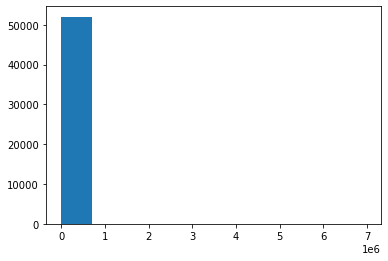

In [66]:
plt.hist(df.lotsizesquarefeet)

In [67]:
#very skewed. Going to use median

In [68]:
df.lotsizesquarefeet.sort_values()

45424    236.0
4509     480.0
19799    540.0
19686    540.0
19685    540.0
         ...  
51630      NaN
51656      NaN
51708      NaN
51734      NaN
52224      NaN
Name: lotsizesquarefeet, Length: 52439, dtype: float64

# pd.set_option('display.max_rows', None)
#commented out because its slowing down my notebook in future runs
#but used this during original analysis

In [69]:
df.lotsizesquarefeet.sort_values(ascending = False)

18741    6971010.0
45235    6971010.0
11202    6971010.0
36442    6971010.0
9192     6971010.0
           ...    
51630          NaN
51656          NaN
51708          NaN
51734          NaN
52224          NaN
Name: lotsizesquarefeet, Length: 52439, dtype: float64

In [70]:
# there area a bunch that are the exact same: 6_971_010.0 
#next highest is 2_840_000
# I don't trust this level of repitition to be accurate, so I will be dropping these 7 rows

In [71]:
df = df[df.lotsizesquarefeet < 3_000_000.0]

(array([5.1982e+04, 6.0000e+01, 1.0000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.3600000e+02, 2.8338760e+05, 5.6653920e+05, 8.4969080e+05,
        1.1328424e+06, 1.4159940e+06, 1.6991456e+06, 1.9822972e+06,
        2.2654488e+06, 2.5486004e+06, 2.8317520e+06]),
 <BarContainer object of 10 artists>)

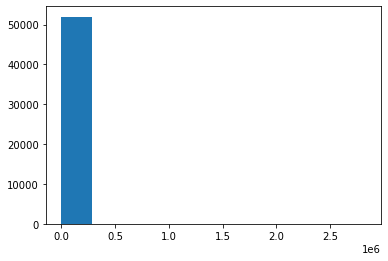

In [72]:
plt.hist(df.lotsizesquarefeet)

In [73]:
df_h = df[df.lotsizesquarefeet < 20_000]

In [74]:
df_h.shape

(48933, 30)

In [75]:
df_h.head()

,parcelid,id,logerror,transactiondate,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,14297519,0,0.025595,2017-01-01,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential
1,17052889,1,0.055619,2017-01-01,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential
2,14186244,2,0.005383,2017-01-01,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential
3,12177905,3,-0.103410,2017-01-01,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
5,12069064,7,0.101723,2017-01-01,261.0,870991,1.0,2.0,1.0,738.0,738.0,6037.0,1.0,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,3101.0,96325.0,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,Single Family Residential


(array([ 1222.,  3745., 14405., 17222.,  5851.,  2903.,  1399.,   884.,
          768.,   534.]),
 array([  236. ,  2212.3,  4188.6,  6164.9,  8141.2, 10117.5, 12093.8,
        14070.1, 16046.4, 18022.7, 19999. ]),
 <BarContainer object of 10 artists>)

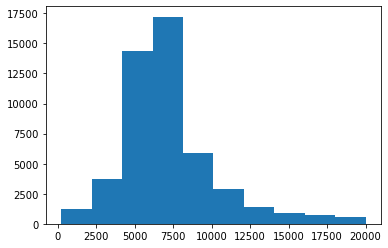

In [76]:
plt.hist(df_h.lotsizesquarefeet)

In [77]:
#too much data dropped. I'll keep the data <3_000_000 sqft and use median to fill blanks. 

In [78]:
df.lotsizesquarefeet.median()

6840.0

In [79]:
df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(value = df.lotsizesquarefeet.median())

In [80]:
df.lotsizesquarefeet.isna().sum()

0

# finishedsquarefeet12 	

(array([3.8946e+04, 1.1691e+04, 9.7600e+02, 1.5600e+02, 4.1000e+01,
        1.2000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  128. ,  2308.1,  4488.2,  6668.3,  8848.4, 11028.5, 13208.6,
        15388.7, 17568.8, 19748.9, 21929. ]),
 <BarContainer object of 10 artists>)

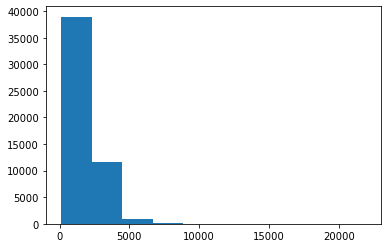

In [81]:
plt.hist(df.finishedsquarefeet12)

In [82]:
# it's very skewed, so use median

In [83]:
df.finishedsquarefeet12.sort_values()
#no weird end values or patterns

6132     128.0
51075    152.0
39656    240.0
2899     280.0
3261     288.0
         ...  
50444      NaN
50699      NaN
51051      NaN
51307      NaN
51757      NaN
Name: finishedsquarefeet12, Length: 52065, dtype: float64

In [84]:
df.finishedsquarefeet12 = df.finishedsquarefeet12.fillna(value = df.finishedsquarefeet12.median())


In [85]:
df.finishedsquarefeet12.isna().sum()

0

# yearbuilt

(array([   21.,   169.,  1015.,  4076.,  3882., 16902., 10188.,  6926.,
         5909.,  2870.]),
 array([1878. , 1891.8, 1905.6, 1919.4, 1933.2, 1947. , 1960.8, 1974.6,
        1988.4, 2002.2, 2016. ]),
 <BarContainer object of 10 artists>)

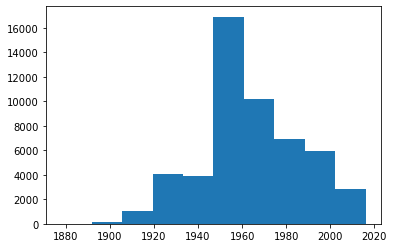

In [86]:
plt.hist(df.yearbuilt)

In [87]:
df.yearbuilt.mode()[0]

1955.0

In [88]:
df.yearbuilt = df.yearbuilt.fillna(value = df.yearbuilt.mode()[0])


In [89]:
df.yearbuilt.isna().sum()

0

# Regionidzip

In [90]:
df.regionidzip.mode()

0    97319.0
Name: regionidzip, dtype: float64

In [91]:
df.regionidzip = df.regionidzip.fillna(value = df.regionidzip.mode()[0])

In [92]:
df.regionidzip.isna().sum()

0

# Notes:
there are no missing bed or bath values. 
If I want, i can make a complete 'fullbathcnt' and 'calculatedbathnbr' columns. 
I'll drop the partially complete columns and I can make whole ones later. 

# Tax
since tax values are used to determine log error, I dropped all tax related columns to avoid target leakage 

In [93]:
df.columns

Index(['parcelid', 'id', 'logerror', 'transactiondate',
       'propertylandusetypeid', 'id', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'propertylandusedesc'],
      dtype='object')

In [94]:
df = df.drop(columns = ['structuretaxvaluedollarcnt',  'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'fullbathcnt', 'calculatedbathnbr'])


In [95]:
col_nulls = nulls_by_col(df)


In [96]:
col_nulls = col_nulls[col_nulls.num_rows_missing != 0]
col_nulls

,num_rows_missing,percent_rows_missing
calculatedfinishedsquarefeet,73,0.140209
censustractandblock,63,0.121003


# calculatedfinishedsquarefeet

(array([3.9095e+04, 1.1706e+04, 9.7700e+02, 1.5600e+02, 4.1000e+01,
        1.2000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  128. ,  2308.1,  4488.2,  6668.3,  8848.4, 11028.5, 13208.6,
        15388.7, 17568.8, 19748.9, 21929. ]),
 <BarContainer object of 10 artists>)

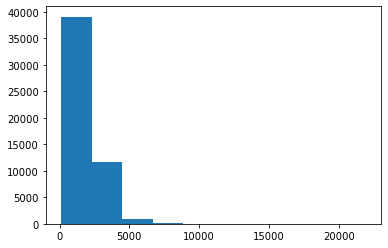

In [97]:
plt.hist(df.calculatedfinishedsquarefeet)

In [98]:
df.calculatedfinishedsquarefeet.sort_values()

6132     128.0
51075    152.0
39656    240.0
2899     280.0
3261     288.0
         ...  
45548      NaN
46629      NaN
48412      NaN
49690      NaN
50078      NaN
Name: calculatedfinishedsquarefeet, Length: 52065, dtype: float64

In [99]:
# definitely skewed. no strange patterns or end values. Set fillna to median

In [100]:
df.calculatedfinishedsquarefeet.median()

1657.0

In [101]:
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(value = df.calculatedfinishedsquarefeet.median())



In [102]:
df.calculatedfinishedsquarefeet.isna().sum()

0

# censustractandblock

(array([5.2001e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.03710111e+13, 1.02636920e+14, 1.44902830e+14, 1.87168739e+14,
        2.29434649e+14, 2.71700558e+14, 3.13966467e+14, 3.56232377e+14,
        3.98498286e+14, 4.40764196e+14, 4.83030105e+14]),
 <BarContainer object of 10 artists>)

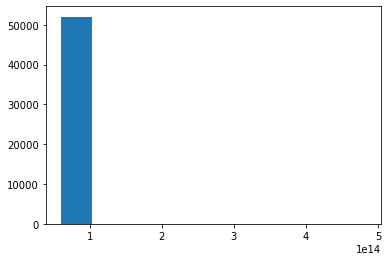

In [103]:
plt.hist(df.censustractandblock)

In [104]:
df.censustractandblock.value_counts()

6.037920e+13    32
6.037920e+13    27
6.059032e+13    24
6.059032e+13    23
6.059032e+13    23
                ..
6.037651e+13     1
6.037242e+13     1
6.059032e+13     1
6.111008e+13     1
6.037503e+13     1
Name: censustractandblock, Length: 31294, dtype: int64

### 10 Reasons to use Census Tract Versus ZIP Code Geography & Demographics

1. Census tracts are polygons and cover a well-defined geographic area.
ZIP codes are clusters of lines; the U.S. Postal Service does not define ZIP Code boundaries. A very large number of 5-digit ZIP Codes are P.O. boxes or specific street addresses and thus represent points not even one line.

2. Census tracts provide more granularity (73,000 areas) than ZIP Codes (43,000).

3. Census tracts are non-changing static geography from decennial census to census.
ZIP codes may change at any time; new ZIP codes may be created or eliminated at any time.

4. Census tracts cover the U.S. wall to wall.
ZIP codes exist only where U.S. mail service is provided.

5. Census tracts align coterminously to county boundaries.

6. Census tracts have well known/exact boundaries.
ZIP codes are groups of lines whose exact structural definition is not officially established.

7. Census tracts provide more statistical uniformity averaging 4,000+ population.
The population of a single ZIP code can exceed 100,000.

8. Census tracts have a large and richer set of associated, more reliable demographic-economic data.
True ZIP Code data are only delivery statistics developed by the U.S. Postal Service.

9. The total land area and water area are known for each census tract, to the square meter.
The total area covered by a ZIP Code is not known, let alone water area.

10. A unique set of census blocks, and hence demographics, can be associated with each census tract.
There is no good way to associate census blocks with ZIP codes.

11. It is entirely feasible to develop and analyze time series data for census tracts.
Time series data by ZIP code is risky due to the inherent potential for changing geographic scope. 

http://proximityone.com/tracts_zips.htm

In [105]:
# census blocks are much smaller than zip codes, so instead of mode I want to use KNN to fill nulls

# in the interest of time, I am goint to drop them (its only 63 rows out of 52K)
# once i have mvp, i intend to circle back to fill them in using KNN


In [106]:
df.shape

(52065, 24)

In [107]:
df = df.dropna()

In [108]:
df.shape

(52002, 24)

In [109]:
# 63 rows dropped successfully

In [110]:
df.head()

,parcelid,id,logerror,transactiondate,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,assessmentyear,censustractandblock,propertylandusedesc
0,14297519,0,0.025595,2017-01-01,261.0,1727539,3.5,4.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,2016.0,6.059063e+13,Single Family Residential
1,17052889,1,0.055619,2017-01-01,261.0,1387261,1.0,2.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,2016.0,6.111001e+13,Single Family Residential
2,14186244,2,0.005383,2017-01-01,261.0,11677,2.0,3.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,2016.0,6.059022e+13,Single Family Residential
3,12177905,3,-0.103410,2017-01-01,261.0,2288172,3.0,4.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,2016.0,6.037300e+13,Single Family Residential
4,12095076,6,-0.001011,2017-01-01,261.0,781532,3.0,4.0,2962.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,2016.0,6.037461e+13,Single Family Residential


In [111]:
col_nulls = nulls_by_col(df)

In [112]:
col_nulls = col_nulls[col_nulls.num_rows_missing != 0]
col_nulls

,num_rows_missing,percent_rows_missing


In [113]:
#Sweet! No nulls!

# put it all together, test it works

In [114]:
df = new_zillow_data()

In [115]:
def handle_missing_values(df, fraction_required_cols, fraction_required_rows):
    #fraction_required_cols * len(df.index)
    #       take the fraction of required columns and mulitply by the number of rows(the number of values that will need to be required by the column is made up of rows)
    #round(fraction_required_cols * len(df.index), 0)
    #       round to zero decimal places
    #int()
    #       convert to integer
    threshold = int(round(fraction_required_cols * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    
    #absence of row values is reflected in the absence of the nubmer of possible boxes, aka number of columns
    threshold = int(round(fraction_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [116]:
df = handle_missing_values(df, .68, .75)

In [137]:
def remaining_nulls(df):
    
    df.regionidcity = df.regionidcity.fillna(value = df.regionidcity.mode()[0]) #fill regionidcity with mode
    
    df = df[df.lotsizesquarefeet < 3_000_000.0] # delete repeating values that are unlikely to be credible
    
    df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(value = df.lotsizesquarefeet.median()) #fill nulls with medain for lotsizesquarefeet

    #df.finishedsquarefeet12 = df.finishedsquarefeet12.fillna(value = df.finishedsquarefeet12.median()) # commented out due to high similairty with sqft column but has more nulls than sqft column

    df.yearbuilt = df.yearbuilt.fillna(value = df.yearbuilt.mode()[0])
    
    df.regionidzip = df.regionidzip.fillna(value = df.regionidzip.mode()[0])
    # delete anything with tax values that can be used in calculating target variable logerror
    df = df.drop(columns = ['structuretaxvaluedollarcnt',  'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'fullbathcnt', 'calculatedbathnbr'])

    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(value = df.calculatedfinishedsquarefeet.median())
    # drop remaining 63 nulls in censustractandblock
    df = df.dropna()
    return df

In [118]:
df.shape

(52439, 30)

In [119]:
df = remaining_nulls(df)

In [120]:
df.shape #matches above, function was put together correctly to match above work

(52002, 24)

In [121]:
df.head()

,parcelid,id,logerror,transactiondate,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,assessmentyear,censustractandblock,propertylandusedesc
0,14297519,0,0.025595,2017-01-01,261.0,1727539,3.5,4.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,2016.0,6.059063e+13,Single Family Residential
1,17052889,1,0.055619,2017-01-01,261.0,1387261,1.0,2.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,2016.0,6.111001e+13,Single Family Residential
2,14186244,2,0.005383,2017-01-01,261.0,11677,2.0,3.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,2016.0,6.059022e+13,Single Family Residential
3,12177905,3,-0.103410,2017-01-01,261.0,2288172,3.0,4.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,2016.0,6.037300e+13,Single Family Residential
4,12095076,6,-0.001011,2017-01-01,261.0,781532,3.0,4.0,2962.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,2016.0,6.037461e+13,Single Family Residential


In [122]:
df.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft', 'regionidzip':'zip', 'lotsizesquarefeet': 'lot_sqft'}, inplace = True)

# Final checks:

In [123]:
df = new_zillow_data()

In [124]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=51)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=51)
    return train, validate, test

In [125]:
def prep_zillow(df, prop_req_cols, prop_req_rows):
    # drop redundant ids, roomcnt appears inaccurate (lots of zeros in rows that have non-zero bed and bath)
    df = df.drop(columns = ['id', 'propertylandusedesc', 'propertylandusetypeid', 'roomcnt'])
    df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')
    
    df = df[(df.bathroomcnt <= 6) & (df.bathroomcnt >= 1)]
    df = df[(df.bedroomcnt <= 6) & (df.bedroomcnt >= 1)]
    
    df = handle_missing_values(df, prop_req_cols, prop_req_rows)
    df = remaining_nulls(df)
    df.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft', 'regionidzip':'zip', 'lotsizesquarefeet': 'lot_sqft'}, inplace = True)
    
    train, validate, test = split_data(df)
    
    return df, train, validate, test

In [126]:
df, train, validate, test = prep_zillow(df, .66, .75)

In [127]:
df.head()

,parcelid,logerror,transactiondate,bath,bed,sqft,finishedsquarefeet12,fips,latitude,longitude,lot_sqft,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,zip,yearbuilt,assessmentyear,censustractandblock
0,14297519,0.025595,2017-01-01,3.5,4.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,1998.0,2016.0,6.059063e+13
1,17052889,0.055619,2017-01-01,1.0,2.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,1967.0,2016.0,6.111001e+13
2,14186244,0.005383,2017-01-01,2.0,3.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,1962.0,2016.0,6.059022e+13
3,12177905,-0.103410,2017-01-01,3.0,4.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,1970.0,2016.0,6.037300e+13
4,12095076,-0.001011,2017-01-01,3.0,4.0,2962.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,1950.0,2016.0,6.037461e+13


In [128]:
l = df[['sqft', 'finishedsquarefeet12']]
l

,sqft,finishedsquarefeet12
0,3100.0,3100.0
1,1465.0,1465.0
2,1243.0,1243.0
3,2376.0,2376.0
4,2962.0,2962.0
...,...,...
52311,2440.0,2440.0
52437,1286.0,1286.0
52439,1032.0,1032.0
52438,1612.0,1612.0


In [130]:
l['difference'] = l.sqft - l.finishedsquarefeet12

In [133]:
l.difference.value_counts()

 0.0       51263
-2.0           8
-701.0         4
-1133.0        3
-727.0         2
           ...  
 863.0         1
-1113.0        1
-798.0         1
-775.0         1
-748.0         1
Name: difference, Length: 150, dtype: int64

# Note:
I don't know which column is most accurate. sqft column had the least nulls that I had to make up for so I will choose that one and drop the finishedsquarefeet12.

In [141]:
def prep_zillow(df, prop_req_cols, prop_req_rows):
    # drop redundant ids, roomcnt appears inaccurate (lots of zeros in rows that have non-zero bed and bath), finishedsqft12 similar to sqft, assessmentyear is the same for all rows
    df = df.drop(columns = ['id', 'propertylandusedesc', 'propertylandusetypeid', 'roomcnt', 'finishedsquarefeet12', 'assessmentyear'])
    df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')
    
    df = df[(df.bathroomcnt <= 6) & (df.bathroomcnt >= 1)]
    df = df[(df.bedroomcnt <= 6) & (df.bedroomcnt >= 1)]
    
    df = handle_missing_values(df, prop_req_cols, prop_req_rows)
    df = remaining_nulls(df)
    df.rename(columns = {'bedroomcnt': 'bed', 'bathroomcnt': 'bath', 'calculatedfinishedsquarefeet' : 'sqft', 'regionidzip':'zip', 'lotsizesquarefeet': 'lot_sqft'}, inplace = True)
    
    train, validate, test = split_data(df)
    
    return df, train, validate, test

In [135]:
df = new_zillow_data()

In [138]:
df, train, validate, test = prep_zillow(df, .66, .75)

In [139]:
df.head()

,parcelid,logerror,transactiondate,bath,bed,sqft,fips,latitude,longitude,lot_sqft,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,zip,yearbuilt,assessmentyear,censustractandblock
0,14297519,0.025595,2017-01-01,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,1998.0,2016.0,6.059063e+13
1,17052889,0.055619,2017-01-01,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,1967.0,2016.0,6.111001e+13
2,14186244,0.005383,2017-01-01,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,1962.0,2016.0,6.059022e+13
3,12177905,-0.103410,2017-01-01,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,1970.0,2016.0,6.037300e+13
4,12095076,-0.001011,2017-01-01,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,1950.0,2016.0,6.037461e+13


In [140]:
df.assessmentyear.value_counts()

2016.0    51429
Name: assessmentyear, dtype: int64

In [ ]:
#there is no difference therefore it will not help predict logerror

In [ ]:
#modify prep file

In [142]:
df = new_zillow_data()

In [143]:
df, train, validate, test = prep_zillow(df, .66, .75)

In [144]:
df

,parcelid,logerror,transactiondate,bath,bed,sqft,fips,latitude,longitude,lot_sqft,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,zip,yearbuilt,censustractandblock
0,14297519,0.025595,2017-01-01,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,1998.0,6.059063e+13
1,17052889,0.055619,2017-01-01,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,1967.0,6.111001e+13
2,14186244,0.005383,2017-01-01,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,1962.0,6.059022e+13
3,12177905,-0.103410,2017-01-01,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,1970.0,6.037300e+13
4,12095076,-0.001011,2017-01-01,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,1950.0,6.037461e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52311,11554146,-0.056152,2017-09-19,4.0,4.0,2440.0,6037.0,34009367.0,-118430958.0,5553.0,0100,6.037272e+07,12447.0,3101.0,96047.0,1937.0,6.037272e+13
52437,11000655,0.020615,2017-09-20,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,0100,6.037101e+07,12447.0,3101.0,96284.0,1940.0,6.037101e+13
52439,12773139,0.037129,2017-09-21,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,0100,6.037434e+07,36502.0,3101.0,96480.0,1954.0,6.037434e+13
52438,17239384,0.013209,2017-09-21,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,1111,6.111008e+07,27110.0,2061.0,97116.0,1964.0,6.111008e+13


In [ ]:
#i think this is a good start for the exploration phase

# Mall Customers

Notebook

    1. Acquire data from the customers table in the mall_customers database.
    
    2. Summarize the data (include distributions and descriptive statistics).
    
    3. Detect outliers using IQR.
    
    4. Split data into train, validate, and test.
    
    5. Encode categorical columns using a one hot encoder (pd.get_dummies).
    
    6. Handles missing values.
    
    7. Scaling

Encapsulate your work in a wrangle_mall.py python module.

# 1

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/mall_customers'

In [ ]:
def new_mall_data():
    return pd.read_sql('''SELECT *
FROM customers
''', url)


import os

def get_mall_data():
    filename = "mall.csv"
    
    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col = 0)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        # read the SQL query into a dataframe
        df_mall = new_mall_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df_mall.to_csv(filename)

        # Return the dataframe to the calling code
        return df_mall

In [ ]:
df = new_mall_data()

In [ ]:
df.head()

# 2
summary stats, info, dtypes, shape, distributions, value_counts,

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

# 3 outliers 
Typically decide between
z-score: appropriate for normal data (normally distributed)
Tukey IQR method: not contingent on normality

but we are specificallay told in the prompt to use IQR

# IQR

Calculate IQR

    Get Q3 and Q1
    Get difference (q3-q1)
    Establish "fences":
        Standard inner fence: k = 1.5
        Standard outer fence: k = 3.0
        Upper bound: q3 + k * IQR
        Lower bound: q1 - k * IQR
        
Note: 1.5 and 3.0 are standards, but you can make them anything. If you have no clue, those standards are good starting points


In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe().round(2)

In [ ]:
cols = ['age', 'annual_income']
cols

In [ ]:
for col in cols:
    print(col)
    q1, q3 = df[col].quantile([0.25, 0.75])
    print(q1, q3)
    print("-----------------")

# 4
split data

In [ ]:
def split_mall_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=51)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=51)
    return train, validate, test

In [ ]:
train, validate, test = split_mall_data(df)

In [ ]:
df.shape, train.shape, validate.shape, test.shape

# 5 
encode catagorical data

In [ ]:
#create dummy columns for catagorical varaibles
dummy_df = pd.get_dummies(df['gender'], dummy_na=False, drop_first= True)
df = pd.concat([df, dummy_df], axis=1)

df = df.drop(columns = 'gender')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
train, validate, test = split_mall_data(df)

In [ ]:
x_train = train.drop(columns=['spending_score'])
y_train = train.spending_score

x_validate = validate.drop(columns=['spending_score'])
y_validate = validate.spending_score

x_test = test.drop(columns=['spending_score'])
y_test = test.spending_score

# 6
no missing values

In [ ]:
df.info()

# 7 
scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def mms_scale_data(train, validate, test):
    
    mms_cols = ['age', 'annual_income']
    
    train_mms = train.copy()
    validate_mms = validate.copy()
    test_mms = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[mms_cols])
    
    train_mms[mms_cols] = mms.transform(train[mms_cols])
    validate_mms[mms_cols] = mms.transform(validate[mms_cols])
    test_mms[mms_cols] = mms.transform(test[mms_cols])
    
    return train_mms, validate_mms, test_mms

In [ ]:
x_train_mms, x_validate_mms, x_test_mms = mms_scale_data(x_train, x_validate, x_test)

In [ ]:
x_train_mms